In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dev.retina_copie import Retina, RetinaWhiten

In [3]:
#args = init(filename='../data/2019-07-23')
from easydict import EasyDict
args = EasyDict({'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'N_X2': 98,
 'N_Y2': 140,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 48,
 'N_eccentricity': 24,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True,
 'zoomW': 300})

In [4]:
print('N_X :', args.N_X)
print('N_Y :', args.N_Y)
print('N_theta :', args.N_theta)
print('N_azimuth :', args.N_azimuth)
print('N_eccentricity :', args.N_eccentricity)
print('N_phase :', args.N_phase)

N_X : 1718
N_Y : 2444
N_theta : 6
N_azimuth : 48
N_eccentricity : 24
N_phase : 2


In [5]:
args.N_X, args.N_Y = 768, 1024
args_N_pic = args.N_Y

In [6]:
retina = Retina(args)

Creation du dictionnaire de filtres en cours...
Dico cree
len finale 6 2 24 16


In [7]:
retina.retina_dico.keys() # theta

dict_keys([0, 1, 2, 3, 4, 5])

In [8]:
retina.retina_dico[0].keys() # phi

dict_keys([0, 1])

In [9]:
retina.retina_dico[0][0].keys() # eccentricity

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [10]:
shape_0 = int(np.sqrt(retina.retina_dico[0][0][0].shape[0]))  # central filter

In [11]:
shape_23 = int(np.sqrt(retina.retina_dico[0][0][23].shape[0])) # periphery filter

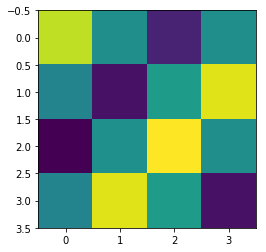

In [12]:
plt.imshow(retina.retina_dico[2][0][0].reshape((shape_0, shape_0)))

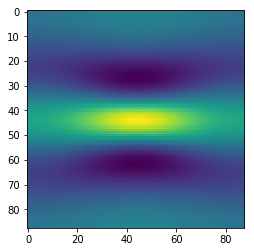

In [13]:
plt.imshow(retina.retina_dico[0][0][23].reshape((shape_23, shape_23)))

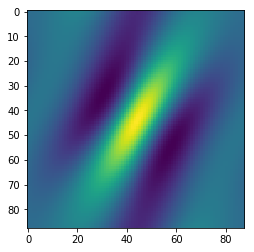

In [14]:
plt.imshow(retina.retina_dico[2][0][23].reshape((shape_23, shape_23)))

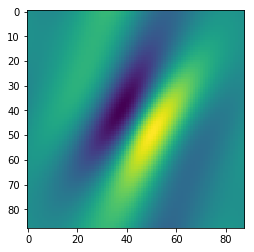

In [15]:
plt.imshow(retina.retina_dico[2][1][23].reshape((shape_23, shape_23)))

In [16]:
from PIL import Image
impath = 'data/i05june05_static_street_boston_p1010764.jpeg'
im = Image.open(impath)

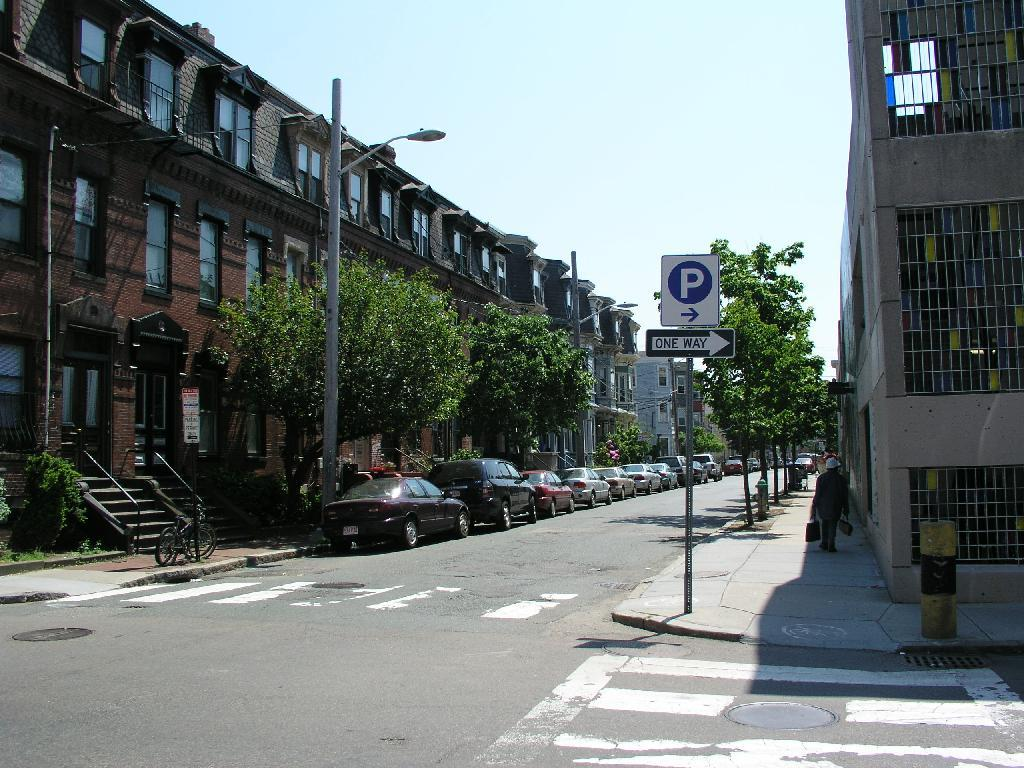

In [17]:
im

In [18]:
im_color_npy = np.asarray(im)
im_color_npy

array([[[ 84, 129, 135],
        [ 84, 128, 131],
        [ 72, 110, 111],
        ...,
        [ 21,  36,  39],
        [ 35,  57,  55],
        [ 74,  99,  96]],

       [[ 84, 129, 135],
        [ 84, 128, 131],
        [ 72, 111, 110],
        ...,
        [ 27,  42,  45],
        [ 38,  60,  58],
        [ 78, 103, 100]],

       [[ 81, 129, 133],
        [ 82, 127, 130],
        [ 70, 110, 109],
        ...,
        [ 32,  47,  50],
        [ 35,  57,  55],
        [ 78, 103, 100]],

       ...,

       [[139, 141, 140],
        [134, 136, 135],
        [129, 131, 130],
        ...,
        [250, 245, 255],
        [253, 248, 255],
        [255, 250, 255]],

       [[132, 134, 133],
        [129, 131, 130],
        [127, 129, 128],
        ...,
        [183, 174, 201],
        [184, 175, 204],
        [184, 175, 202]],

       [[129, 131, 130],
        [130, 132, 131],
        [131, 133, 132],
        ...,
        [177, 168, 199],
        [179, 170, 201],
        [180, 171, 202]]

In [19]:
im_bw = im.convert("L")

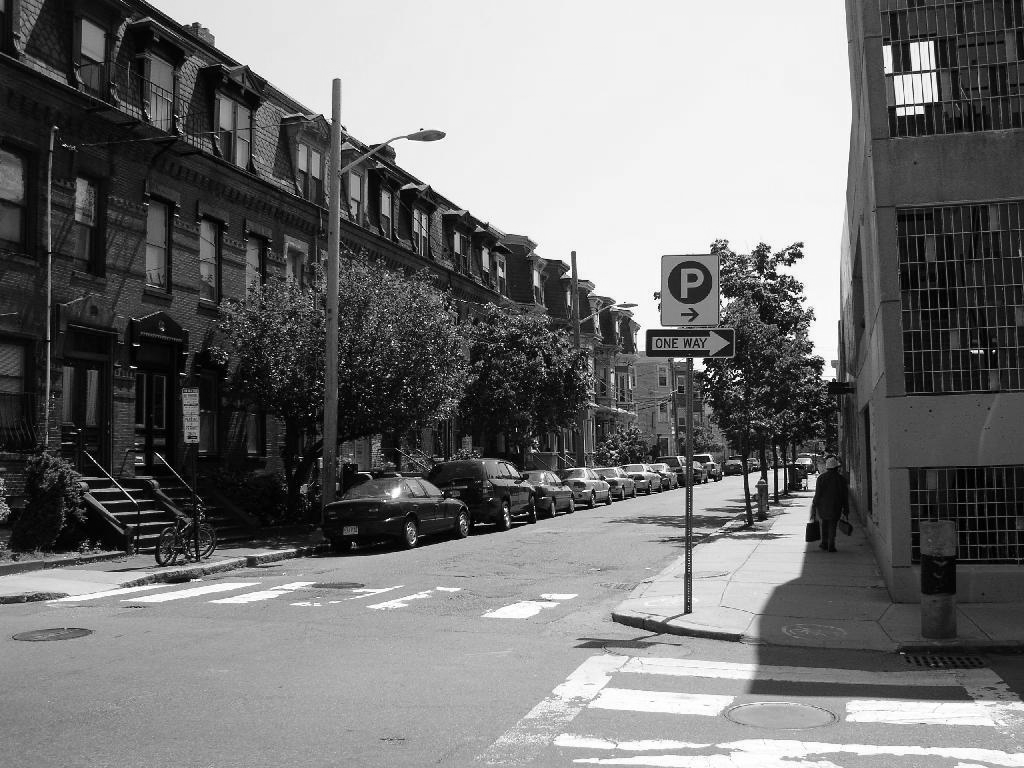

In [20]:
im_bw

In [21]:
im_npy = np.asarray(im_bw)

In [22]:
im_npy

array([[116, 115,  98, ...,  31,  50,  91],
       [116, 115,  99, ...,  37,  53,  95],
       [115, 113,  97, ...,  42,  50,  95],
       ...,
       [140, 135, 130, ..., 247, 250, 252],
       [133, 130, 128, ..., 179, 180, 180],
       [130, 131, 132, ..., 174, 176, 177]], dtype=uint8)

In [23]:
args.N_X, args.N_Y = im_npy.shape
args_N_pic = args.N_Y

In [24]:
## 

In [25]:
whiten_transform = RetinaWhiten(args)
im_whiten = whiten_transform(im_npy)

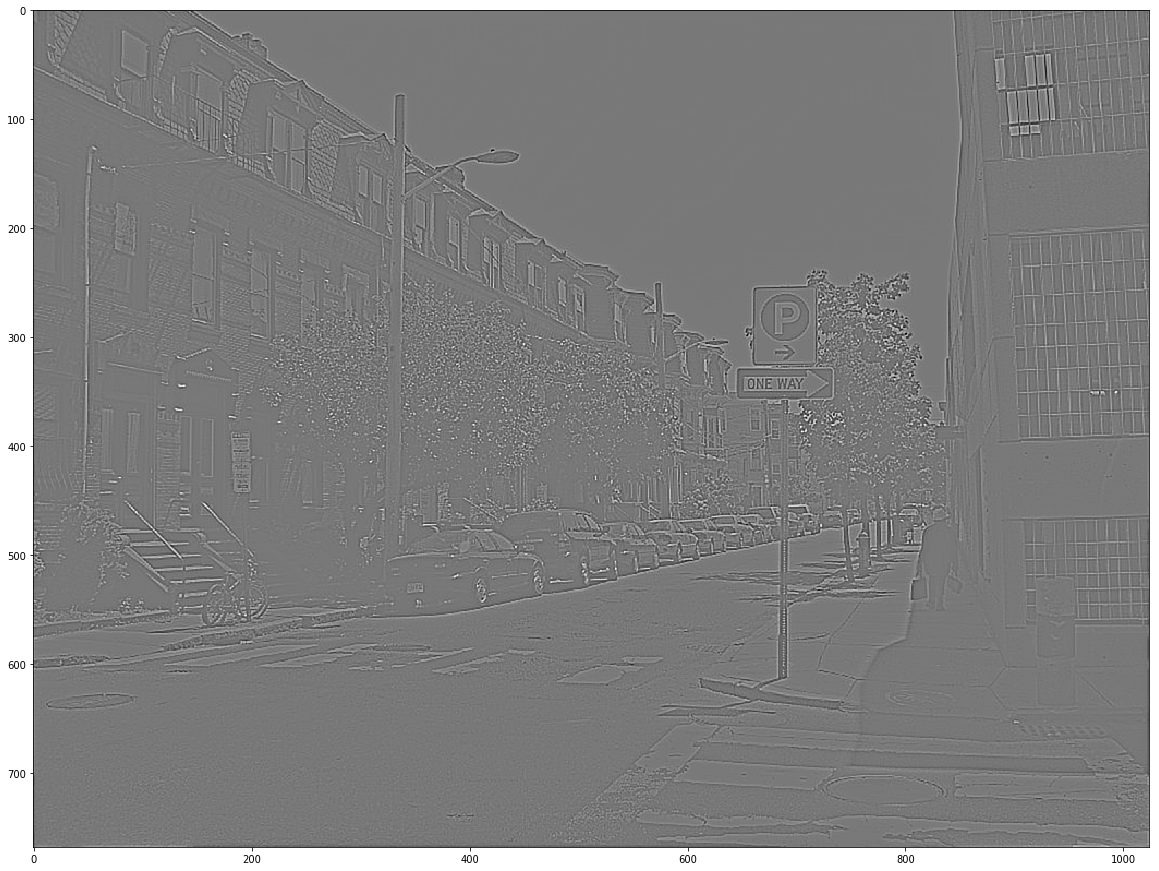

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(im_whiten, cmap='gray')

In [27]:
pixel_fullfield, retina_features = retina.transform(im_whiten)

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (50, 50) filter (50, 50)
image (5

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (3

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (3

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (2

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (3

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (2

In [28]:
retina_features.shape

(13824,)

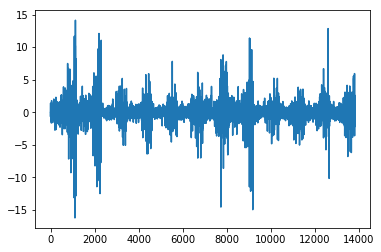

In [29]:
plt.plot(retina_features)

In [30]:
img_trans = retina.inverse_transform(retina_features)

AttributeError: 'Retina' object has no attribute 'inverse_transform'

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img_trans, cmap='gray')

In [ ]:
from LogGabor import LogGabor

N_theta=6
rho = 1.41
ecc_max = .8  # self.args.ecc_max
sf_0_r = 0.03  # self.args.sf_0_r
sf_0_max = 0.45
B_theta = np.pi / N_theta / 2  # self.args.B_theta
B_sf = .4

pe = {'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise': 
0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 
'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N': 
0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 
'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 
1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 
'use_cache': True, 'figpath': 'results', 'edgefigpath': 
'results/edges', 'matpath': 'cache_dir', 'edgematpath': 
'cache_dir/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize': 
14.0, 'formats': ['pdf', 'png', 'jpg'], 'dpi': 450, 'verbose': 0}


lg = LogGabor(pe=pe)

i_eccentricity = 15
N_eccentricity = 20
ecc = ecc_max * (1 / rho) ** (N_eccentricity - i_eccentricity)

i_theta = 5
N_theta = 6
theta_ref = i_theta * np.pi / N_theta
sf_0 = 0.5 * sf_0_r / ecc
sf_0 = np.min((sf_0, sf_0_max))

N = 200
dimension_filtre = int( N /2 * ecc)
#if dimension_filtre % 2 == 1:
#    dimension_filtre += 1
#dimension_filtre = 100


# print("dimension_filtre", dimension_filtre)
lg.set_size((dimension_filtre, dimension_filtre))

i_phase = 1
phase = i_phase * np.pi / 2

x = dimension_filtre // 2

y = dimension_filtre // 2

params = {'sf_0': sf_0,
           'B_sf': B_sf,
           'theta': theta_ref,
           'B_theta': B_theta}

filter = lg.normalize(lg.invert(lg.loggabor(x, y, **params) * 
np.exp(-1j * phase)))

In [ ]:
plt.imshow(filter)

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.21) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.11) ** (N_eccentricity - np.arange(N_eccentricity)))

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(10)))